L1/L2 регуляризация 
-----
1. У нас есть данные ввиде множества пар $X$ и $y$: $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$
2. Мы хотим найти такую функцию $\hat{f}(x)$ которая бы минимизировала 
$$
MSE(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 \rightarrow \text{min}_{\theta}
$$
3. Мы будем искать $\hat{f}(x)$ в предположении что это линейная функция:
$$
\hat{f}(x, \theta) = \theta_0 + x^{[1]}\theta_1 + x^{[2]}\theta_2 + \ldots + x^{[m]}\theta_m
$$

**Вопрос**:

Как запретить коэффициентам $\theta$ быть большими?

**Ответ**:

Возьмем и добавим их в оптимизируемую функцию, т.к. мы ищем минимиум этой функции то в процессе оптимизации 
они будут (по-крайней мере мы на это надеемся) уменьшаться:


$$
MSE_{l_1}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m |\theta_j| \rightarrow \text{min}
$$

$$
MSE_{l_2}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m \theta_j^2 \rightarrow \text{min}
$$


Обратите внимание что в сумме по тетта  индексация начинается с 1, а не с 0. Поскольку свободный коэффициент $\theta_0$ **нет смысла регуляризовывать** — если мы будем штрафовать за его величину, то получится, что мы учитываем некие априорные представления о близости целевой переменной к нулю и отсутствии необходимости в учёте её смещения. 

Коэффициент $\alpha$ называется **параметром регуляризации** и контролирует баланс
между подгонкой под обучающую выборку и штрафом за излишнюю сложность, этот параметр **подбирается на кросс-валидации**.


-----

-----

Обе модели реализованы в sklearn в модуле linear_models:

sklearn.linear_models.Lasso $\rightarrow l_1$

sklearn.linear_models.Ridge $\rightarrow l_2$

Давайте посмотрим как это выглядит на практике

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error

In [15]:
params = {
    'n_samples':2000,
    'n_features':9,
    'n_informative':5,
    'bias':10,
    'noise':5,
    'coef':True, 
    'random_state': 51
}


X, y, _coef = make_regression(**params)


# Загляните внутрь функции make_regression, что означает каждый параметр?
# курсор внутрь круглых скобок и нажать shift+TAB

In [3]:
print('Истинные коэффициенты модели:\n', np.round(_coef, 3), )

Истинные коэффициенты модели:
 [67.246  0.    16.882 98.986  0.    15.995  0.     2.751  0.   ]


## 2.1 Lasso регуляризация

1. Создайте объект класса Lasso с параметрами:
    - `alpha=50`
    - `fit-intercept=True`
    - `random_state=33`
2. Обучите модель Лассо регресии на данных X: `model.fit(X, y)`
3. Предскажите с помощью этой модели значения целевой переменной: `model.predict(X)`
4. Посчитайте MSE между предсказанным и истинным значением.
5. Напечатайте веса обученной линейной модели. Что вы можете о них сказать?
6. Используя параметр `alpha=15, 5, 2, 1, 0.3, 0.1, 0.03` обучите модель Lasso и посторойте зависимость **нормы** вектора весов $\theta$ от величины `alpha`. Прокомментируйте полученный результат


In [4]:
print('Истинные коэффициенты модели:\n', np.round(_coef, 3), )
model = Lasso(random_state=33)

for alpha in [15, 5, 2, 1, 0.3, 0.1, 0.03]:
    model.set_params(**{'alpha':alpha})
    model.fit(X, y)
    
    print(alpha, np.sqrt(np.sum(model.coef_**2)), np.sum(np.abs(model.coef_)))
    print(np.round(model.coef_,1))
    print()

Истинные коэффициенты модели:
 [67.246  0.    16.882 98.986  0.    15.995  0.     2.751  0.   ]
15 97.96940837906297 138.10549277071172
[52.4  0.   1.3 82.7 -0.   1.6 -0.   0.  -0. ]

5 113.56181541112028 178.75536486402987
[62.3  0.  11.7 93.5 -0.  11.2 -0.   0.   0. ]

2 118.53363862510658 191.89937020357317
[65.3  0.  14.8 96.8 -0.  14.   0.   1.   0. ]

1 120.23010412371879 196.9225942265118
[66.3  0.  15.8 97.9 -0.  15.   0.   2.   0. ]

0.3 121.42832366045923 200.43885089568377
[67.   0.  16.5 98.7 -0.  15.6  0.   2.6  0. ]

0.1 121.77205619781653 201.58051597007517
[67.2  0.  16.7 98.9 -0.1 15.8  0.   2.8  0.1]

0.03 121.89257255689193 202.07481680815107
[67.3  0.  16.8 98.9 -0.1 15.9  0.   2.9  0.1]



## 2.2 Ridge регуляризация

1. Тоже но для Ridge регрессии
2. Прокомментируйте различия между Ridge и Lasso

In [5]:
print('Истинные коэффициенты модели:\n', np.round(_coef, 3), )
model = Ridge(random_state=33)

for alpha in [15, 5, 2, 1, 0.3, 0.1, 0.03]:
    model.set_params(**{'alpha':alpha})
    model.fit(X, y)
    
    print(alpha, np.sqrt(np.sum(model.coef_**2)), np.sum(np.abs(model.coef_)))
    print(np.round(model.coef_,1))
    print()

Истинные коэффициенты модели:
 [67.246  0.    16.882 98.986  0.    15.995  0.     2.751  0.   ]
15 121.00151302202046 200.74760223653215
[66.8  0.  16.7 98.2 -0.2 15.8  0.   2.9  0.2]

5 121.62832985974035 201.78389958422267
[67.1  0.  16.8 98.7 -0.2 15.9  0.   2.9  0.2]

2 121.81764548562411 202.09688177221787
[67.2  0.  16.8 98.9 -0.2 15.9  0.   2.9  0.2]

1 121.88088195985591 202.2014253926067
[67.3  0.  16.8 98.9 -0.2 15.9  0.   2.9  0.2]

0.3 121.9251866389709 202.27467041056966
[67.3  0.  16.8 99.  -0.2 15.9  0.   2.9  0.2]

0.1 121.93785104599894 202.29560732201523
[67.3  0.  16.8 99.  -0.2 15.9  0.   2.9  0.2]

0.03 121.94228421113789 202.30293626670044
[67.3  0.  16.8 99.  -0.2 15.9  0.   2.9  0.2]



## 2.3 Давайте посмотрим что происходит с весами модели, в процессе обучения градиентным спуском Лассо регрессии

1. Попробуйте уменьшить значение параметра (например 0.01, 0.003, 0.0001) `eta0` отвечающего за learning rate, как изменились графики измениня коэффициентов линейной модели во время обучения?
2. Следует ли регуляризовывать свободный член регресси (intercept), почему?

In [12]:
sgd_params = {
    'loss':'squared_error',
    'penalty':'l1',
    'alpha':.1,
    'l1_ratio':1,
    'fit_intercept':True,
    'max_iter':None, 
    'shuffle':True,
    'random_state':76,
    'eta0' : 0.1,
    'learning_rate':'constant',
}

In [16]:
coef = []
intercept = []

for m_iter in range(1, 20, 1):
    
    sgd_params['max_iter'] = m_iter
    model = SGDRegressor(**sgd_params)
    model.fit(X, y)
    
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    
coef = np.array(coef)
intercept = np.array(intercept)
print(model.coef_, model.intercept_)

[ 6.56377050e+01  0.00000000e+00  1.60460361e+01  9.62167293e+01
 -1.51132520e-01  1.55868982e+01  3.57815198e-04  2.70001567e+00
  5.10879832e-02] [9.84247812]


/homes/anvar/anaconda3/envs/cuda311/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/homes/anvar/anaconda3/envs/cuda311/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/homes/anvar/anaconda3/envs/cuda311/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/homes/anvar/anaconda3/envs/cuda311/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to im

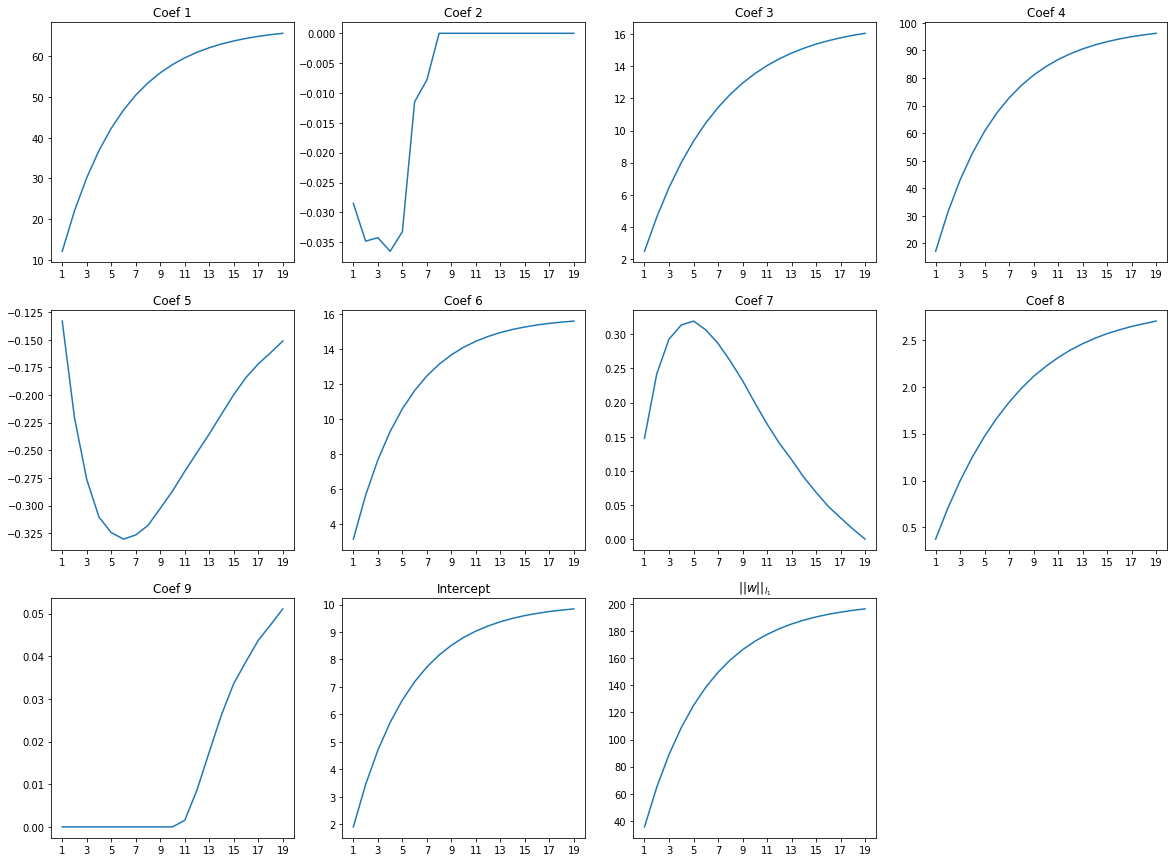

In [17]:
plt.figure(figsize=(20,15))
for n in range(1, 10):
    ax = plt.subplot(int('34{}'.format(n)))
    ax.plot(list(range(1, 20, 1)), coef[:, n-1])
    ax.set_xticks(range(1, 20, 2))
    ax.set_title(f'Coef {n}')
    
ax = plt.subplot(3,4,10)
ax.plot(list(range(1, 20, 1)), intercept)
ax.set_xticks(range(1, 20, 2))
ax.set_title(f'Intercept')

ax = plt.subplot(3,4,11)
ax.plot(list(range(1, 20, 1)), np.abs(coef).sum(axis=1))
ax.set_xticks(range(1, 20, 2))
ax.set_title('$||w||_{l_1}$');

# 3. "Предсказание" числа в другой системе исчисления

Построим линейную модель которая переводит числа из *двоичной* системы исчисления в *десятичную*. Для этого сгенерируйте тренировочную выборку размера 10000 наблюдений, в которой в качестве признаков выступают бинарные векторы длины 32, а в качестве `y` значение в десятичной системе исчисления. Например:

- $x_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]$, $y_1 = 0$
- $x_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]$, $y_2 = 525856$
- $x_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]$, $y_3 = 3$


1. Обучите 3 линейные модели на **всех наблюдениях**: Линейная регрессия, Лассо регрессия, Гребневая регрессия (для всех моделей устновите параметр `fit_intercept=False`, что контролирует этот параметр?).
2. Сравните ошибку, например MSE для всех трех моделей.
3. Сравните коэффиценты обученных моделей, что вы можете о них сказать?
4. Разделите ваши данные на тренировочную и тестовую выборки, обучите модели на тренировочной части данных, сделайте предсказание на тестовой. Сравните коэффициенты обученных моделей, сравните качество (в терминах MSE) на тестовой и тренировочной выборках.
5. **Прокомментируйте полученные результаты**


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

y = np.random.randint(0, 2**32, size=10_000)

def gen_x(y):
    _x = bin(y)[2:]
    n = 32 - len(_x)
    return [int(sym) for sym in '0'*n + _x]

X = np.array([gen_x(x) for x in y])

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

def convert_bin_to_dec_ai(array):
    return model.predict(array)

y_pred = convert_bin_to_dec_ai(X)

In [20]:
model.intercept_

0.0

In [23]:
np.round(model.coef_)

array([2.14748365e+09, 1.07374182e+09, 5.36870912e+08, 2.68435456e+08,
       1.34217728e+08, 6.71088640e+07, 3.35544320e+07, 1.67772160e+07,
       8.38860800e+06, 4.19430400e+06, 2.09715200e+06, 1.04857600e+06,
       5.24288000e+05, 2.62144000e+05, 1.31072000e+05, 6.55360000e+04,
       3.27680000e+04, 1.63840000e+04, 8.19200000e+03, 4.09600000e+03,
       2.04800000e+03, 1.02400000e+03, 5.12000000e+02, 2.56000000e+02,
       1.28000000e+02, 6.40000000e+01, 3.20000000e+01, 1.60000000e+01,
       8.00000000e+00, 4.00000000e+00, 2.00000000e+00, 1.00000000e+00])



jupyter notebook c вашим решением необходимо отправить на почту kurmukovai@gmail.com, с темой письма [iitp-intro-ds-2024-ha3-Surname], например [iitp-intro-ds-2024-ha3-Kurmukov] до 11:59:59 МСК 22.02.2024.

- Назовите ваш нотбук так же как и тему письма
- Ваш нотбук должен исполняться по Kernel -> Restart & Run all без падений и ошибок